# Covid-19 Visualization, EDA and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('covid_19_data.csv') 

In [3]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17372 entries, 0 to 17371
Data columns (total 8 columns):
SNo                17372 non-null int64
ObservationDate    17372 non-null object
Province/State     8638 non-null object
Country/Region     17372 non-null object
Last Update        17372 non-null object
Confirmed          17372 non-null float64
Deaths             17372 non-null float64
Recovered          17372 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,17372.000000,17372.000000,17372.000000,17372.000000
mean,8686.500000,2728.469837,157.762376,677.526364
std,5015.008774,13971.163403,1229.777237,5119.658520
min,1.000000,0.000000,0.000000,0.000000
25%,4343.750000,9.000000,0.000000,0.000000
50%,8686.500000,92.000000,1.000000,1.000000
75%,13029.250000,621.000000,7.000000,60.000000
max,17372.000000,258361.000000,24648.000000,95200.000000


In [6]:
# Dropping SNo Column
data.drop(['SNo'],axis=1,inplace = True)

### Data Cleaning

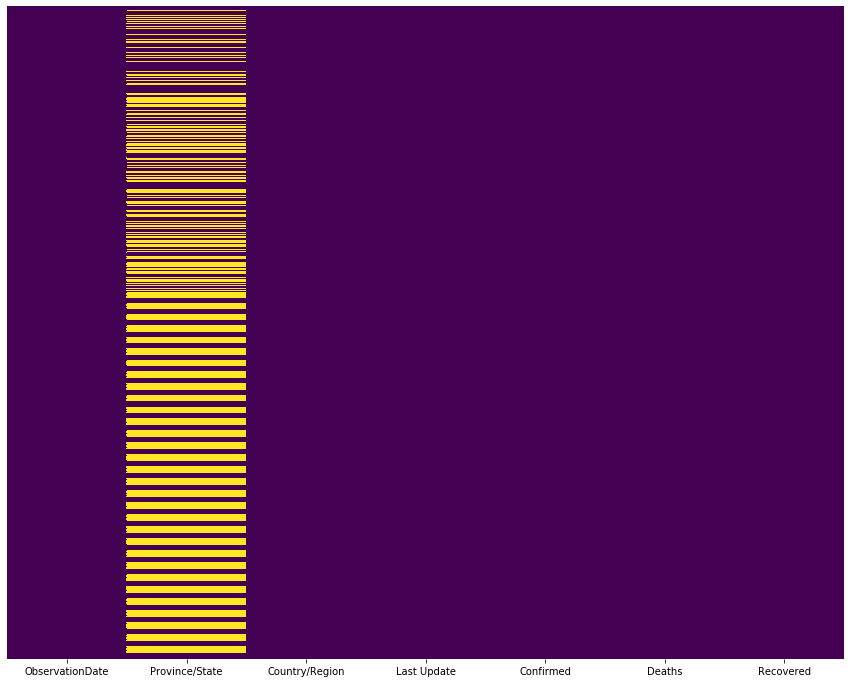

In [7]:
# Looking for missing values
plt.figure(figsize=(15,12))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# converting ObservationDate to DateTime format
data["ObservationDate"]=pd.to_datetime(data["ObservationDate"])

## Exploratory Data Analysis

In [8]:
#Grouping different types of cases as per the date
data_datewise=data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [9]:
data_datewise.columns

Index(['Confirmed', 'Recovered', 'Deaths'], dtype='object')

Text(0.5, 1.0, 'Confirmed Cases over Time')

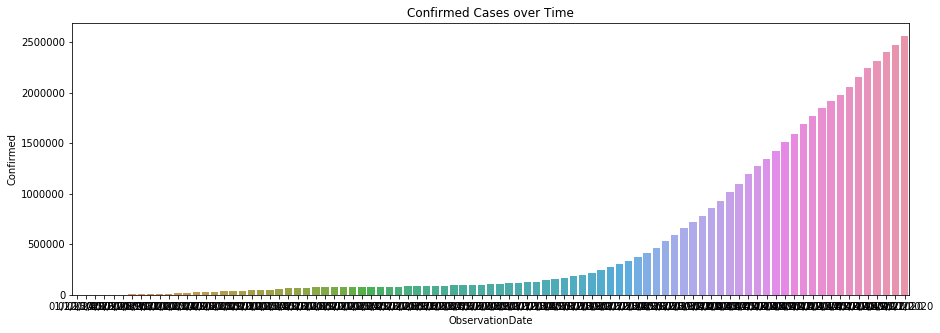

In [10]:
plt.figure(figsize = (15,5))
sns.barplot(x=data_datewise.index,y= data_datewise['Confirmed'])
plt.title('Confirmed Cases over Time')

Text(0.5, 1.0, 'Recovered Cases over Time')

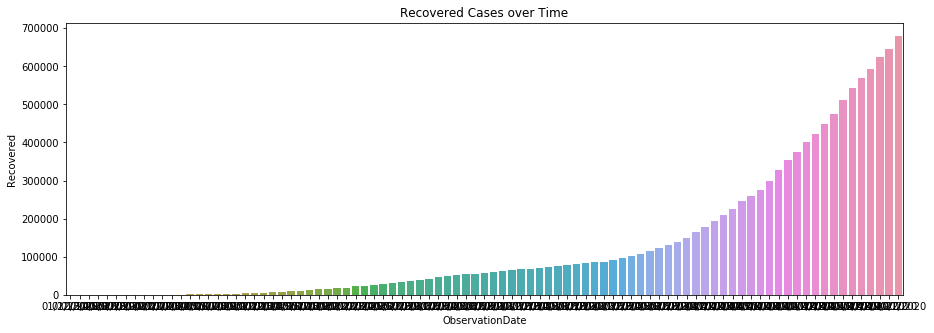

In [11]:
plt.figure(figsize = (15,5))
sns.barplot(x=data_datewise.index,y= data_datewise['Recovered'])
plt.title('Recovered Cases over Time')

Text(0.5, 1.0, 'Deaths over Time')

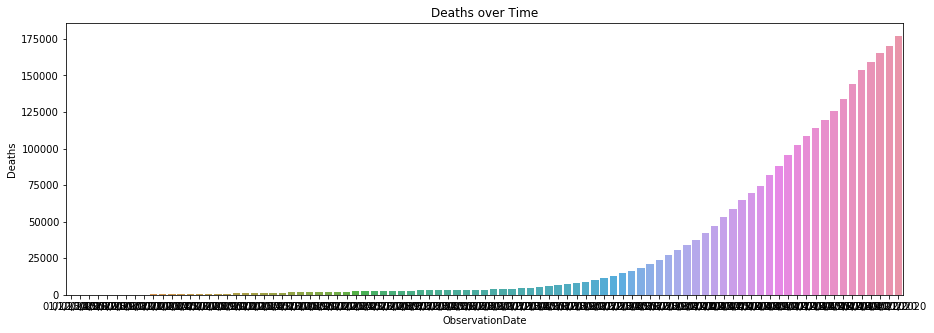

In [12]:
plt.figure(figsize = (15,5))
sns.barplot(x=data_datewise.index,y=data_datewise['Deaths'])
plt.title('Deaths over Time')

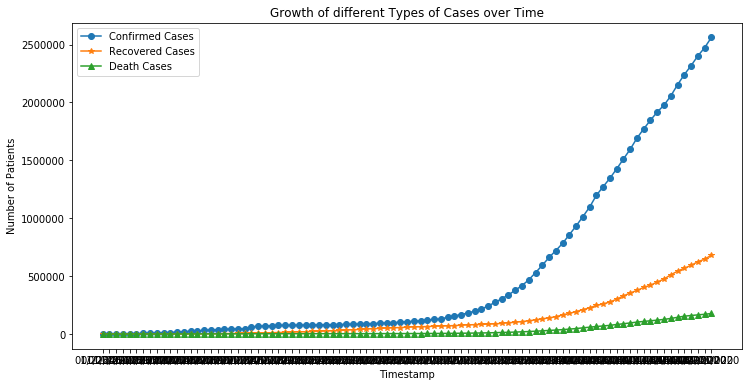

In [13]:
# Growth Rate of Confirmed, Recovered, Deaths
plt.figure(figsize=(12,6))
plt.plot(data_datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(data_datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(data_datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.title("Growth of different Types of Cases over Time")
plt.legend()

## Worldwide Corona cases Confirmed

In [14]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [15]:
#Replace Mainland China to China
data['Country/Region'].replace(to_replace='Mainland China',value='China',inplace=True)

In [16]:
data_countrywise = data[data["ObservationDate"]==data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [17]:
data_map = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = data_countrywise.index,
        locationmode = "country names",
        z = data_countrywise['Confirmed'],
        text = data_countrywise.index,
        colorbar = {'title' : 'Confirmed Cases'},
      ) 

layout = dict(title = 'Confirmed Cases Worldwide',
                geo = dict(showframe = False,projection = {'type':'natural earth'})
             )

In [18]:
choromap_confirmed = go.Figure(data = [data_map],layout = layout)
iplot(choromap_confirmed,validate=False)

In [19]:
data_map = dict(
        type = 'choropleth',
        colorscale = 'Inferno',
        reversescale = True,
        locations = data_countrywise.index,
        locationmode = "country names",
        z = data_countrywise['Deaths'],
        text = data_countrywise.index,
        colorbar = {'title' : 'Confirmed Deaths'},
      )

layout = dict(title = 'Deaths Worldwide',
                geo = dict(showframe = False,projection = {'type':'natural earth'})
             )

In [20]:
choromap_deaths = go.Figure(data = [data_map],layout = layout)
iplot(choromap_deaths,validate=False)

In [21]:
data_map = dict(
        type = 'choropleth',
        colorscale = 'Cividis_r',
        reversescale = True,
        locations = data_countrywise.index,
        locationmode = "country names",
        z = data_countrywise['Recovered'],
        text = data_countrywise.index,
        colorbar = {'title' : 'Recovered Cases Worldwide'},
      ) 

layout = dict(title = 'Recovered Cases',
                geo = dict(showframe = False,projection = {'type':'natural earth'})
             )

In [22]:
choromap_recovered = go.Figure(data = [data_map],layout = layout)
iplot(choromap_recovered,validate=False)

In [23]:
data_countrywise = data[data["ObservationDate"]==data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

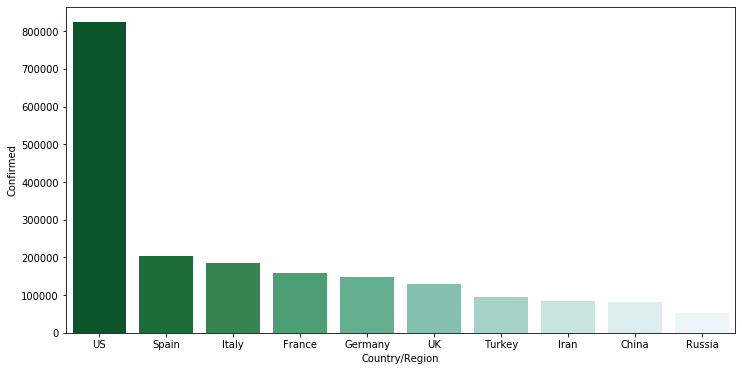

In [24]:
top10_Confirmed = data_countrywise.sort_values(["Confirmed"],ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10_Confirmed.index, y=top10_Confirmed['Confirmed'],palette='BuGn_r')

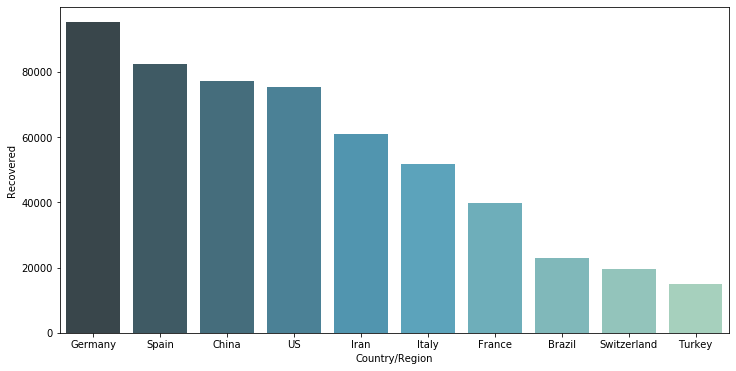

In [25]:
top10_Recovered = data_countrywise.sort_values(["Recovered"],ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10_Recovered.index, y=top10_Recovered['Recovered'],palette='GnBu_d')

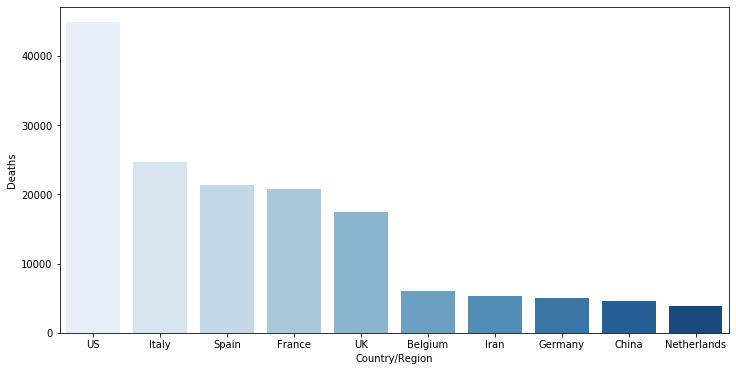

In [26]:
top10_Deaths = data_countrywise.sort_values(["Deaths"],ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top10_Deaths.index, y=top10_Deaths['Deaths'],palette='Blues')

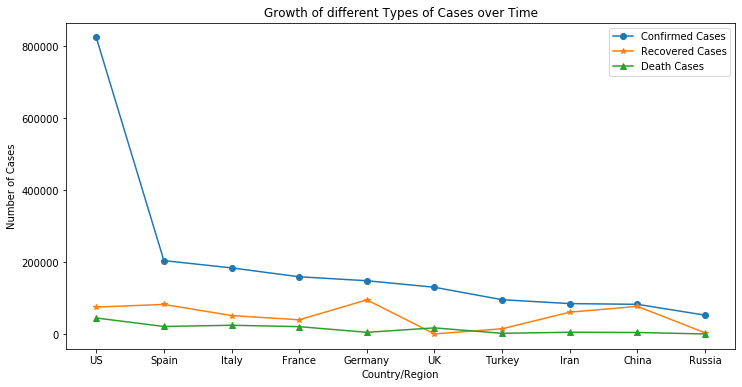

In [27]:
# Growth Rate of Confirmed, Recovered, Deaths by the top 10 Contries with Confirmed cases
plt.figure(figsize=(12,6))
plt.plot(top10_Confirmed["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(top10_Confirmed["Recovered"],marker="*",label="Recovered Cases")
plt.plot(top10_Confirmed["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Cases")
plt.xlabel("Country/Region")
plt.title("Growth of different Types of Cases over Time")
plt.legend()

## Times Series Forecasting using Prophet

In [31]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

### Transforming data for forecasting

In [38]:
confirmed = data.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = data.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = data.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [44]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [45]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [46]:
recovered.head()

,ds,y
0,2020-01-22,28.0
1,2020-01-23,30.0
2,2020-01-24,36.0
3,2020-01-25,39.0
4,2020-01-26,52.0


In [48]:
deaths.head()

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


### Forecasting confirmed cases with Prophet(Baseline)

In [50]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)
future = model.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
93,2020-04-24
94,2020-04-25
95,2020-04-26
96,2020-04-27
97,2020-04-28


In [52]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2020-04-24,2.805273e+06,2.784797e+06,2.824146e+06
94,2020-04-25,2.887322e+06,2.857349e+06,2.914261e+06
95,2020-04-26,2.966683e+06,2.922847e+06,3.004317e+06
96,2020-04-27,3.044636e+06,2.989923e+06,3.089870e+06
97,2020-04-28,3.123421e+06,3.054032e+06,3.178079e+06


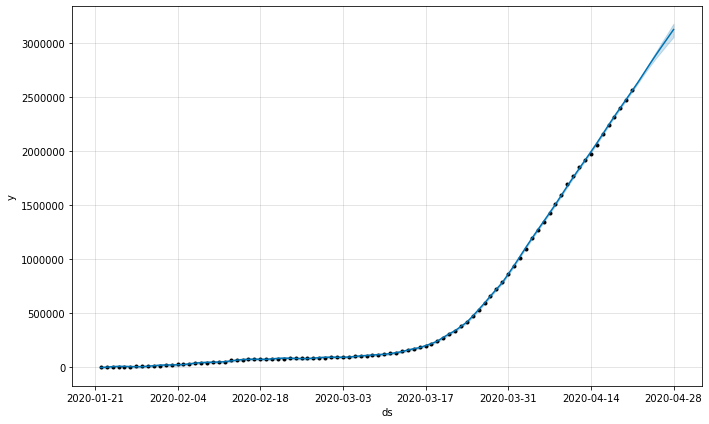

In [53]:
confirmed_forecast_plot = model.plot(forecast)

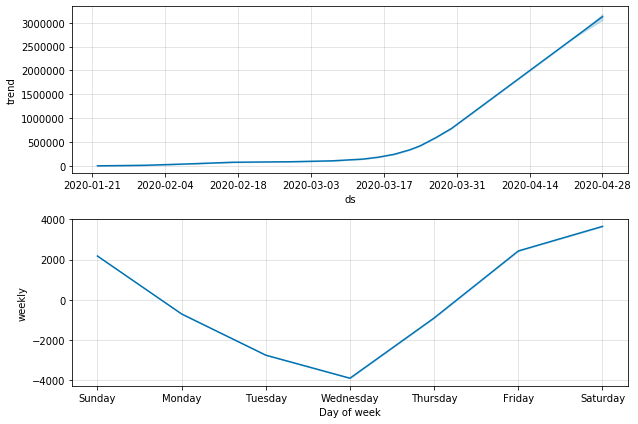

In [54]:
forecast_components = model.plot_components(forecast)

### Forecasting Recovered cases with Prophet(Baseline)

In [55]:
model = Prophet(interval_width=0.95)
model.fit(recovered)
future = model.make_future_dataframe(periods=7)
future_recovered = future.copy() # for non-baseline predictions
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
93,2020-04-24
94,2020-04-25
95,2020-04-26
96,2020-04-27
97,2020-04-28


In [56]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2020-04-24,736235.526036,723771.666834,748034.613474
94,2020-04-25,760944.733622,747704.394491,774117.542683
95,2020-04-26,785246.583274,770520.109189,800426.822757
96,2020-04-27,809454.758686,790012.556693,826476.224178
97,2020-04-28,835241.184056,814243.255900,857528.783697


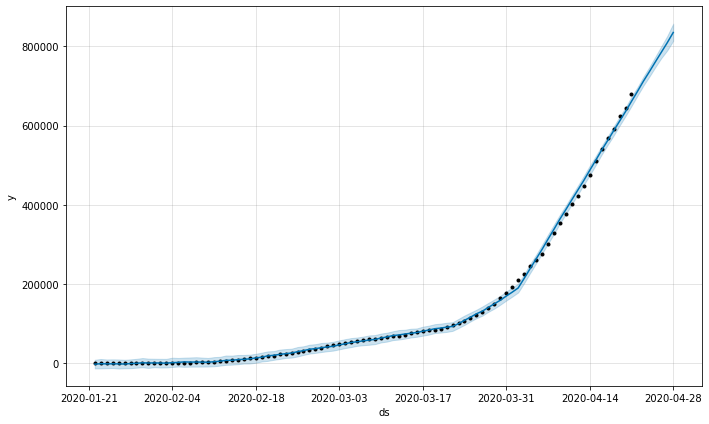

In [57]:
recovered_forecast_plot = model.plot(forecast)

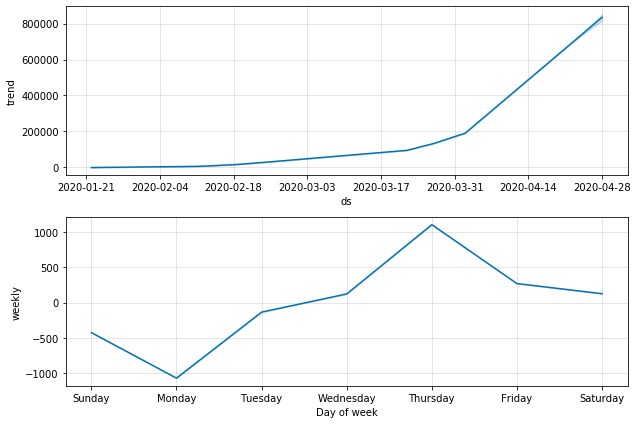

In [58]:
forecast_components = model.plot_components(forecast)

### Forecast Deaths using Prophet(baseline) 

In [60]:
model = Prophet(interval_width=0.95)
model.fit(deaths)
future = model.make_future_dataframe(periods=7)
future_deaths = future.copy() # for non-baseline predictions
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
93,2020-04-24
94,2020-04-25
95,2020-04-26
96,2020-04-27
97,2020-04-28


In [61]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2020-04-24,196883.375369,194497.315725,199087.413421
94,2020-04-25,203302.965792,200727.917283,205895.221353
95,2020-04-26,209587.016094,206393.617893,212763.975143
96,2020-04-27,215839.250704,212073.650248,219896.922707
97,2020-04-28,222592.636009,217842.139882,227611.537446


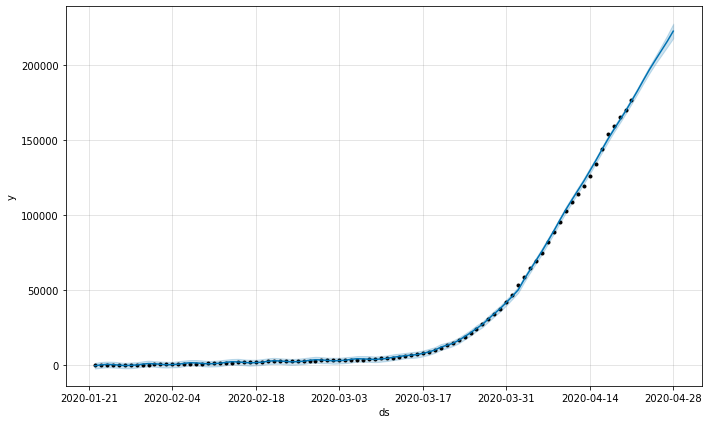

In [62]:
deaths_forecast_plot = model.plot(forecast)

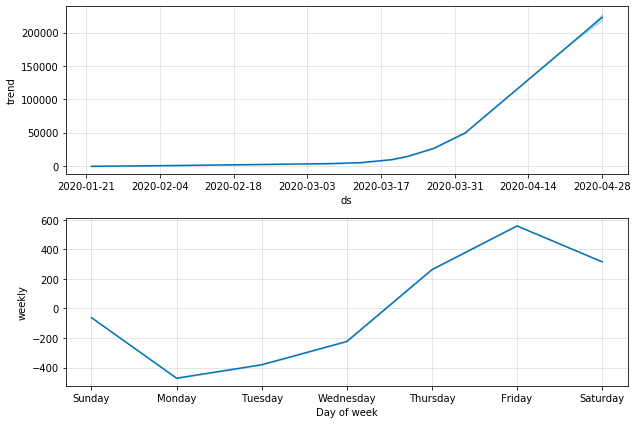

In [64]:
forecast_components = model.plot_components(forecast)